In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report,confusion_matrix, roc_auc_score, accuracy_score)
from sklearn import metrics
import scikitplot as skp

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load dataset and fillempty collumns 
t_df = pd.read_csv('datasets/titanic_dataset.csv' ,
                   usecols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked','Fare'])
#peak into dataset info
t_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#check dimension of data
t_df.shape

(891, 8)

<AxesSubplot:xlabel='Survived', ylabel='count'>

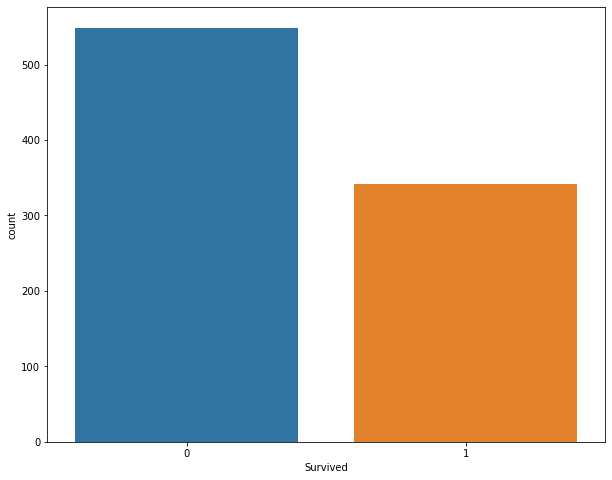

In [ ]:
sb.countplot(x = 'Survived', data = t_df)

In [ ]:
#check for the presence of null values
t_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [ ]:
#count null values on each feature
t_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
#fill the age values with the mean
t_df['Age'].fillna((t_df['Age'].mean()),inplace = True)

#drop the 2 empark null columns
t_df.dropna(inplace = True)

In [ ]:
t_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
t_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#divide independent and dependent variables
Y = t_df[['Survived']]
X = t_df[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]


In [ ]:
#split the data
x_train,x_test,y_train,y_test = tts(X,Y,test_size = 0.20)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

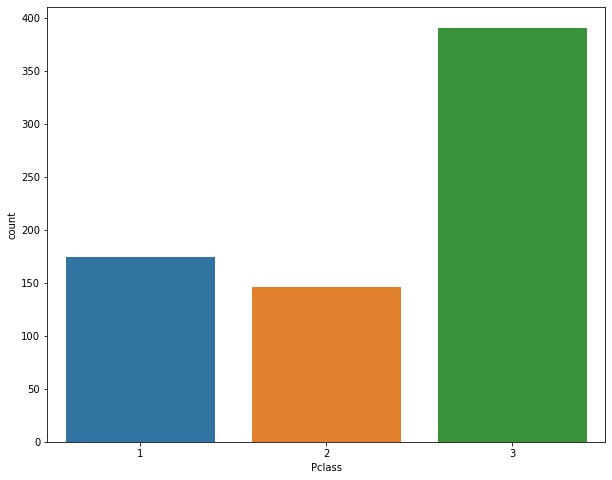

In [ ]:
#count pclass
sb.countplot(x = 'Pclass',data = x_train)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

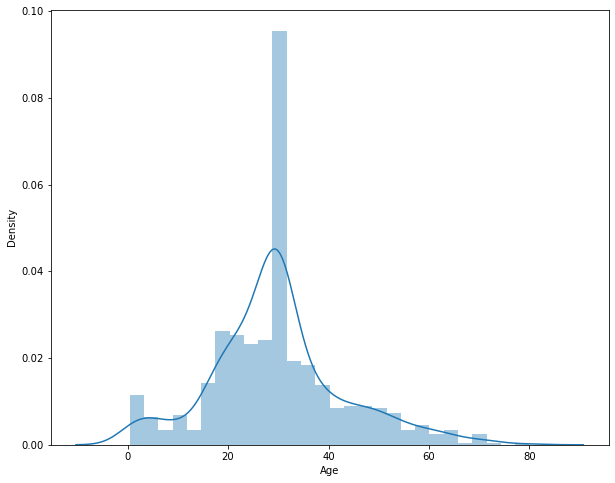

In [ ]:
#check distribution of age
sb.distplot(x_train['Age'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

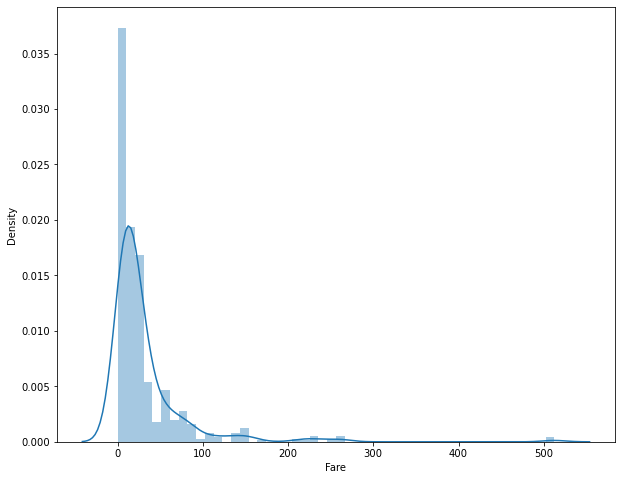

In [ ]:
#check distribution of fare
sb.distplot(x_train['Fare'])

In [ ]:
#perfom Z-score normalisation
age_scaler = StandardScaler()
age_scaler.fit(pd.DataFrame(x_train['Age']))
#transorm age column
x_train['Age'] = age_scaler.transform(x_train[['Age']])
x_test['Age'] = age_scaler.transform(x_test[['Age']])
x_train['Age']

796    1.450824
527   -0.002914
577    0.697626
319    0.772946
793   -0.002914
         ...   
69    -0.281530
172   -2.164523
40     0.772946
624   -0.658129
94     2.204021
Name: Age, Length: 711, dtype: float64

In [ ]:
#perfom Z-score normalisation on fare
fare_scaler = StandardScaler()
fare_scaler.fit(pd.DataFrame(x_train['Fare']))

#tfransorm fare
x_train['Fare'] = fare_scaler.transform(x_train[['Fare']])
x_test['Fare'] = fare_scaler.transform(x_test[['Fare']])
x_train['Fare']

796   -0.120535
527    3.707712
577    0.465299
319    2.001680
793   -0.027364
         ...   
69    -0.458045
172   -0.409748
40    -0.442163
624   -0.312665
94    -0.485655
Name: Fare, Length: 711, dtype: float64

In [ ]:
#change sex to 1 for male or 0 for female
x_train['Sex'] = x_train['Sex'].map({'female':0,'male':1})
x_test['Sex'] = x_test['Sex'].map({'female':0,'male':1})

In [ ]:
#convert categorial column Embarked to numerical
emb_encoder = preprocessing.LabelEncoder()
emb_encoder.fit(pd.DataFrame(x_train['Embarked']))
#tranform embarked column
x_train['Embarked'] = emb_encoder.transform(x_train[['Embarked']])
x_test['Embarked'] = emb_encoder.transform(x_test[['Embarked']])
x_train.head()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
796,1,0,1.450824,0,0,2,-0.120535
527,1,1,-0.002914,0,0,2,3.707712
577,1,0,0.697626,1,0,2,0.465299
319,1,0,0.772946,1,1,0,2.001680
793,1,1,-0.002914,0,0,0,-0.027364


<AxesSubplot:>

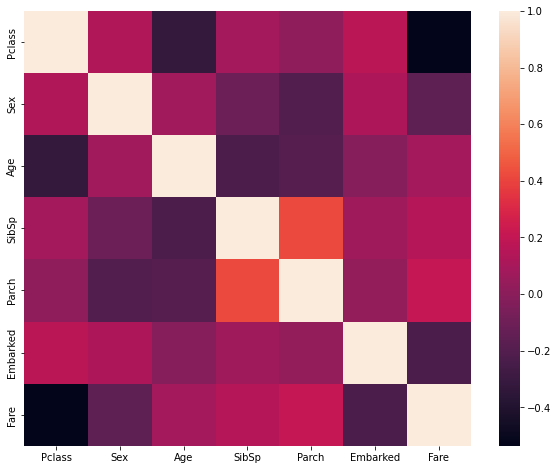

In [ ]:
#check for correlation between features
sb.heatmap(x_train.corr())

In [ ]:
del x_train['Pclass']
del x_test['Pclass']
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 796 to 94
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       711 non-null    int64  
 1   Age       711 non-null    float64
 2   SibSp     711 non-null    int64  
 3   Parch     711 non-null    int64  
 4   Embarked  711 non-null    int64  
 5   Fare      711 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 38.9 KB


In [ ]:
#prepare data for regression model
x_train_copy = x_train
x_train = x_train.values
y_train = y_train.values
x_train.shape

(711, 6)

In [ ]:
#build and train model
logReg = LogisticRegression()
logReg.fit(x_train,y_train)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#Check the coefficient of model
coeff = pd.concat([pd.DataFrame(x_train_copy.columns),pd.DataFrame(np.transpose(logReg.coef_))],axis = 1)
coeff.columns = ['feature','coefficient']

#appent intercept feature
coeff.append({'feature':'Intercept','coefficient':logReg.intercept_[0]},ignore_index = True)
coeff

C:\Users\admin\AppData\Local\Temp\ipykernel_11684\3882222788.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeff.append({'feature':'Intercept','coefficient':logReg.intercept_[0]},ignore_index = True)


,feature,coefficient
0,Sex,-2.465848
1,Age,-0.229228
2,SibSp,-0.381606
3,Parch,-0.227853
4,Embarked,-0.155677
5,Fare,0.689145


In [ ]:
#prepare for evaluation
x_test = x_test.values
y_test = y_test.values


In [ ]:
#make a prediction
y_pred = logReg.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [ ]:
#make a confusion matrix
confusion_matrix(y_test,y_pred)

array([[93, 13],
       [21, 51]], dtype=int64)

In [ ]:
#print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.80      0.71      0.75        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
#print accuracy
print('Accuracy :{:.2f}'.format(accuracy_score(y_test,y_pred) *100))

Accuracy :80.90


## Now,plotting different classification result by using Scikit-plot library ##

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

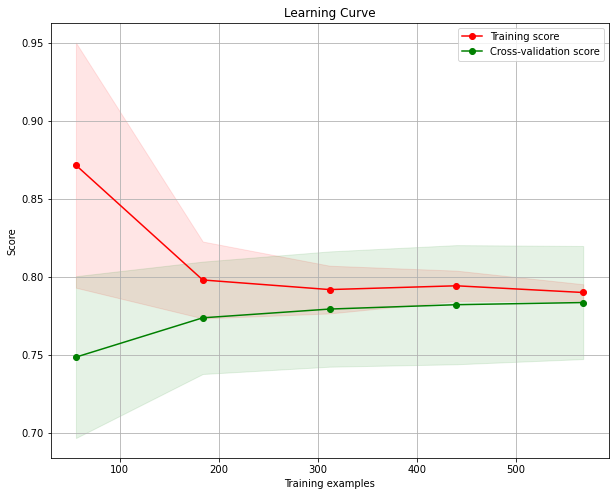

In [ ]:
skp.estimators.plot_learning_curve(logReg,x_train,y_train)

## Predict probability instead of class in logistic regression

In [ ]:
y_pred_prob = logReg.predict_proba(x_test)

## ROC Curve

0.8596042976939204


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

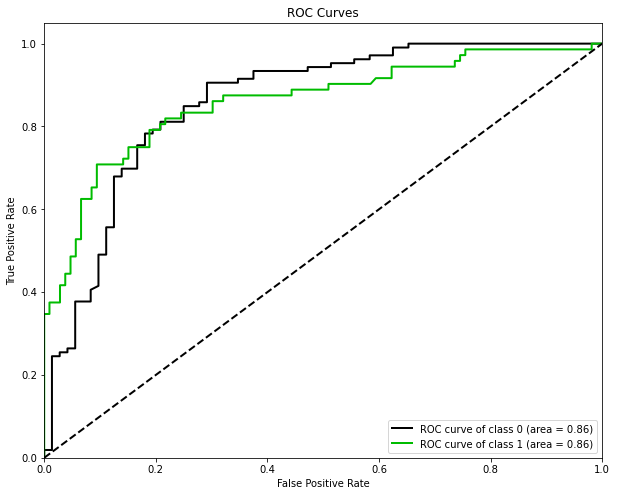

In [ ]:
class1_prob = list()
for i in y_pred_prob:
    class1_prob.append(i[1])
print(roc_auc_score(y_test,class1_prob))

skp.metrics.plot_roc_curve(y_test,y_pred_prob,curves = ['each_class'])

## Confusion matrix

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

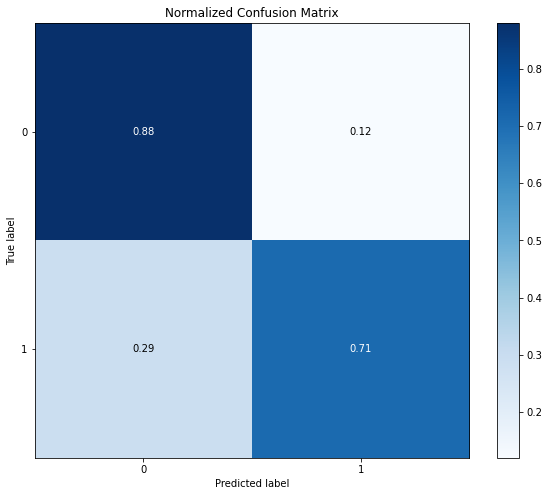

In [ ]:
skp.metrics.plot_confusion_matrix(y_test,y_pred,normalize = True)

### fit the model with L1 norm

In [ ]:
logReg_L1 = LogisticRegression(penalty = 'l2' , class_weight = 'balanced')
logReg_L1.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = logReg_L1.predict(x_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

## USING DECISION TREE ON TITANIC DATA

In [ ]:
#build model
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#check on test data
y_pred =dec_tree.predict(x_test)

print('Accuracy :{:.2f}%'.format(accuracy_score(y_test,y_pred) * 100))

Accuracy :82.58%


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

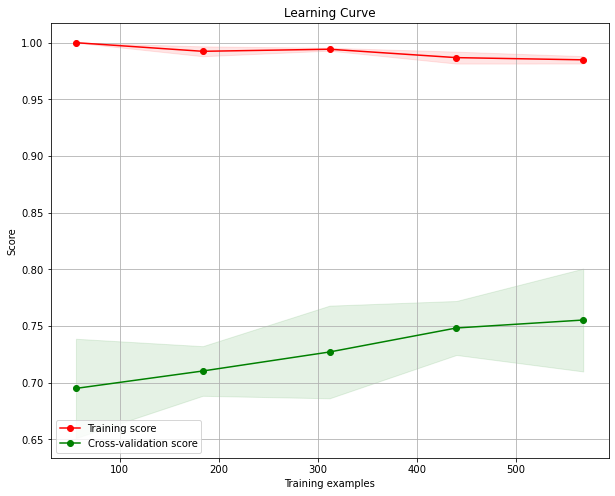

In [ ]:
#learning curve
skp.estimators.plot_learning_curve(dec_tree,x_train,y_train)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

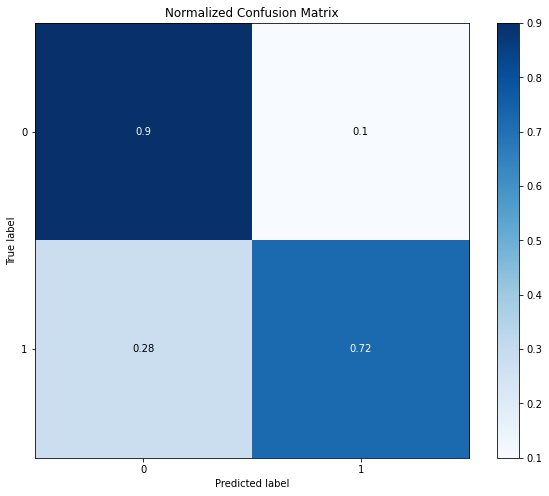

In [ ]:
#confusion matrix
skp.metrics.plot_confusion_matrix(y_test,y_pred,normalize = True)

0.8161032494758911


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

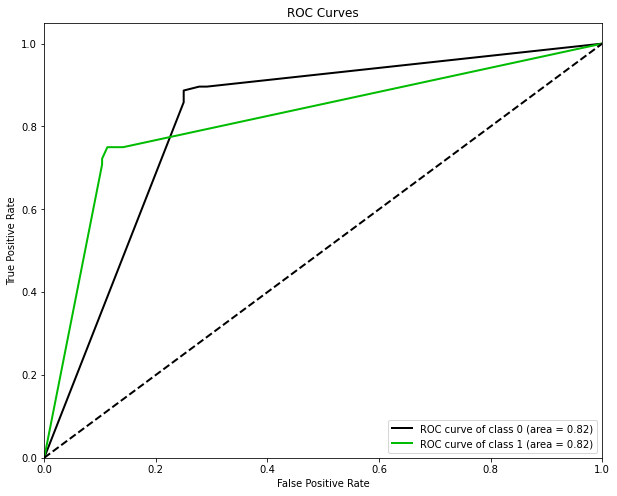

In [ ]:
#plot ROC curve
y_pred_prob = dec_tree.predict_proba(x_test)
class1_prob = list()
for i in y_pred_prob:
    class1_prob.append(i[1])
print(roc_auc_score(y_test,class1_prob))
skp.metrics.plot_roc_curve(y_test,y_pred_prob,curves = ['each_class'])

In [ ]:
dec_tree4 = tree.DecisionTreeClassifier(max_depth = 5)
dec_tree4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#analyse on test data
y_pred = dec_tree4.predict(x_test)
print('Accuracy :{:.2f}'.format(accuracy_score(y_test,y_pred) *100))

Accuracy :82.02


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

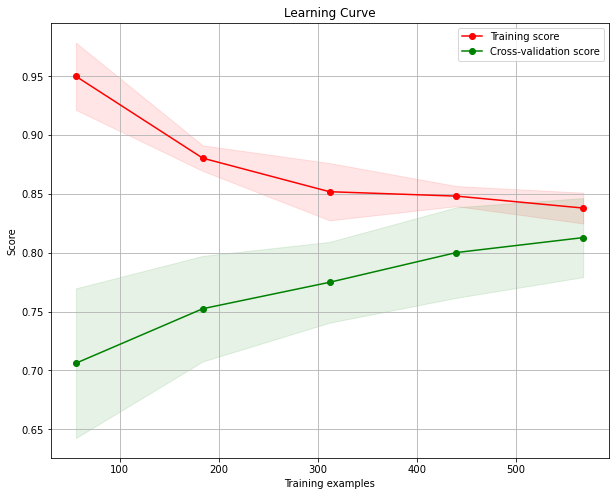

In [ ]:
#plot leaning curve
skp.estimators.plot_learning_curve(dec_tree4,x_train,y_train)

0.8481394129979035


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

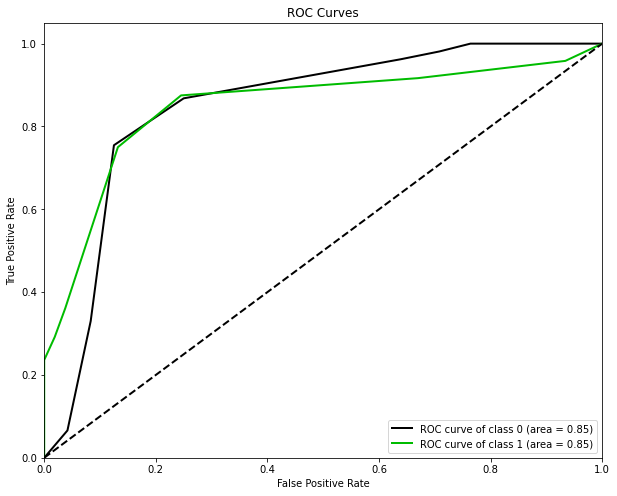

In [ ]:
#print roc curve
y_pred_prob = dec_tree4.predict_proba(x_test)
class1_prob = []
for i in y_pred_prob:
    class1_prob.append(i[1])
print(roc_auc_score(y_test,class1_prob))
skp.metrics.plot_roc_curve(y_test,y_pred_prob,curves=['each_class'])

## VISUALIZING DECISION TREES

In [ ]:
dot_data = tree.export_graphviz(dec_tree4,out_file = None,
                              feature_names = x_train_copy.columns,
                              class_names = ['0','1'],
                              filled = True , rounded = True,
                              special_characters = True)
graph = graphviz.Source(dot_data)
graph

NameError: name 'graphviz' is not defined

## ANALYSE USING A RANDOM FOREST

In [ ]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)

C:\Users\admin\AppData\Local\Temp\ipykernel_11684\3291312649.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
#analyse using test data
y_pred = forest.predict(x_test)
print('Accuracy : {:.2f}'.format(accuracy_score(y_test,y_pred) *100))

Accuracy : 81.46


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

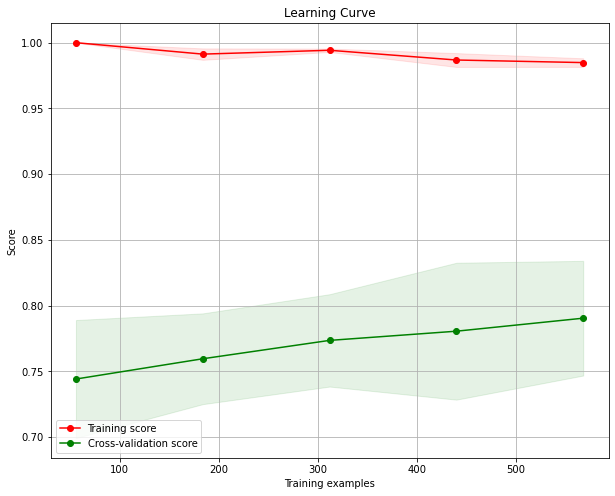

In [ ]:
#plot learning curve
skp.estimators.plot_learning_curve(forest,x_train,y_train)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

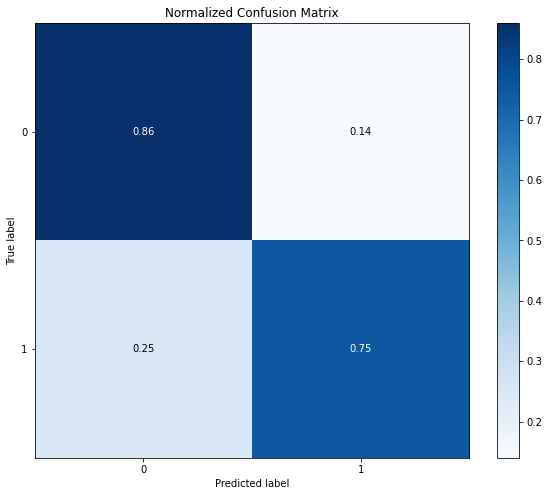

In [ ]:
#plot confusion matrix
skp.metrics.plot_confusion_matrix(y_test,y_pred,normalize = True)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

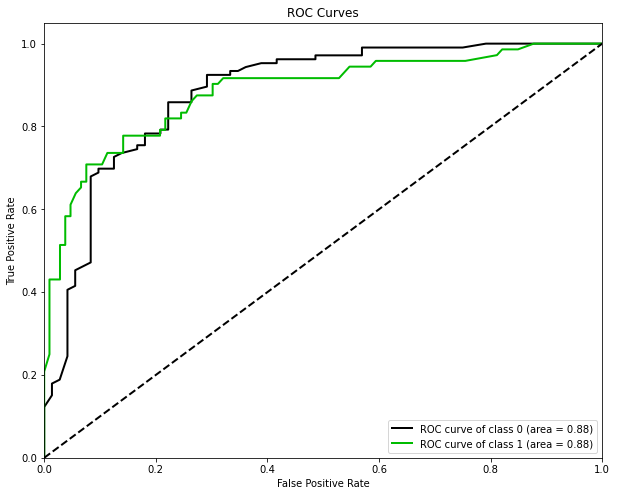

In [ ]:
#plot roc curve
y_pred_prob = forest.predict_proba(x_test)
class1_prob = []
for i in y_pred_prob:
     class1_prob.append(i[1])
'Accuracy :{:.2f}%'.format(roc_auc_score(y_test,class1_prob) * 100)
skp.metrics.plot_roc_curve(y_test,y_pred_prob,curves = ['each_class'])

In [ ]:
# upgraded model
forest5 = RandomForestClassifier(max_depth = 10,
                                 n_estimators = 100,
                                 max_features = 4)
forest5.fit(x_train,y_train)

C:\Users\admin\AppData\Local\Temp\ipykernel_11684\3493795881.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest5.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, max_features=4)

In [ ]:
#analyse on test data
y_pred = forest5.predict(x_test)

print('Accuracy :{:.2f}%'.format(accuracy_score(y_test,y_pred) * 100))

Accuracy :81.46%


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

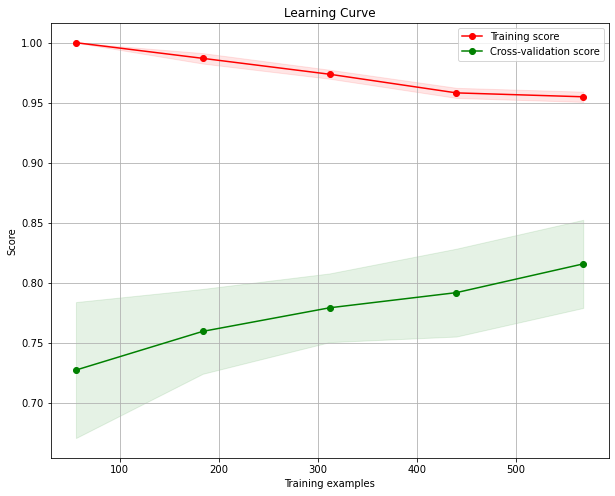

In [ ]:
#learning curve
skp.estimators.plot_learning_curve(forest5,x_train,y_train)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

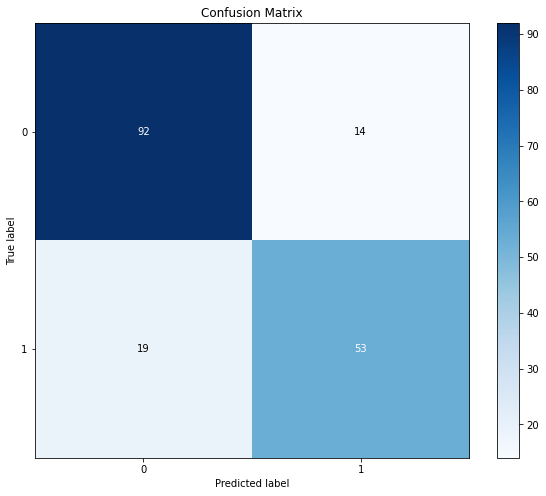

In [ ]:
#confusion matrix
skp.metrics.plot_confusion_matrix(y_test,y_pred)

87.9651467505241


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

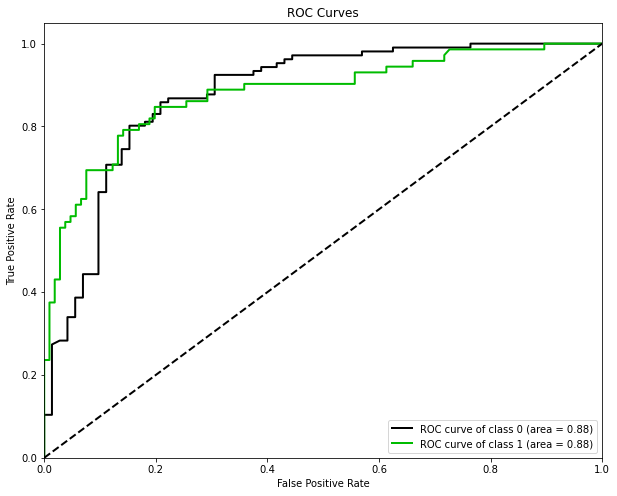

In [ ]:
#roc curve
y_pred_prob = forest5.predict_proba(x_test)
class1_prob = []
for prob in y_pred_prob:
    class1_prob.append(prob[1])
print(roc_auc_score(y_test,class1_prob) * 100)
skp.metrics.plot_roc_curve(y_test,y_pred_prob,curves = ['each_class'])

## NAIVE BAYES ALGORYTHM

In [ ]:
n_b_model = GaussianNB()
n_b_model.fit(x_train,y_train)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
#check on test data
y_pred = n_b_model.predict(x_test)

print('Accuracy :{:.2f}%'.format(accuracy_score(y_test,y_pred) * 100 ))

Accuracy :81.46%


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

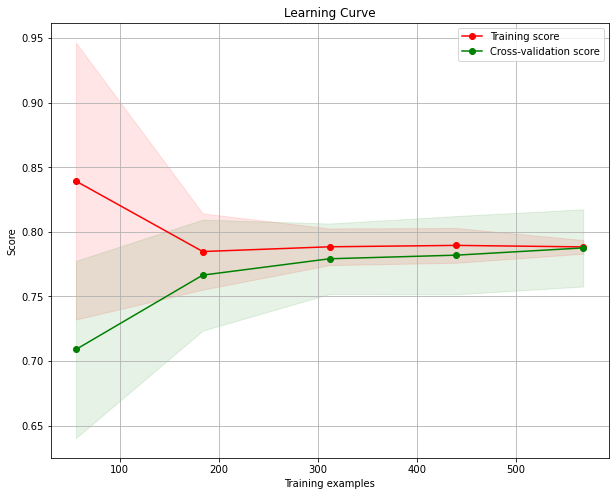

In [ ]:
#plot learning curve
skp.estimators.plot_learning_curve(n_b_model,x_train,y_train)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

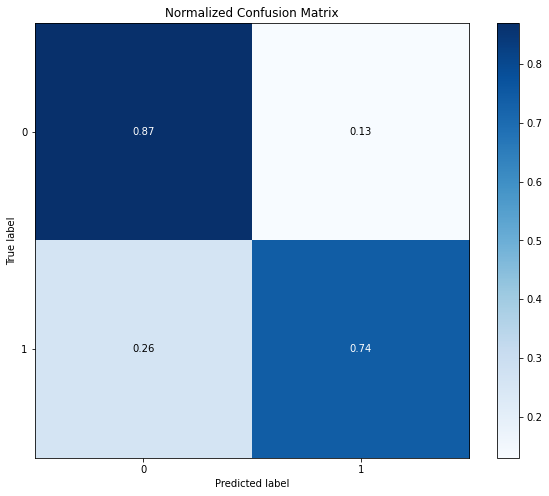

In [ ]:
#plot confusion matrix
skp.metrics.plot_confusion_matrix(y_test,y_pred,normalize = True)

roc auc score :85.61


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

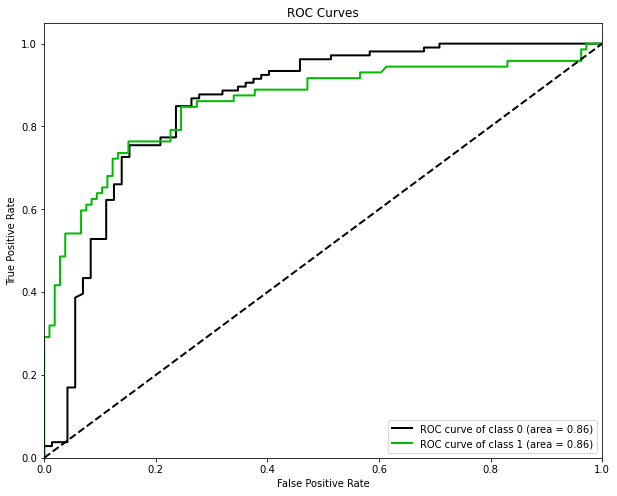

In [ ]:
#plot roc curve
y_pred_prob = n_b_model.predict_proba(x_test)
clas_prob = []
for prob in y_pred_prob:
    clas_prob.append(prob[1])
print('roc auc score :{:.2f}'.format(roc_auc_score(y_test,clas_prob) * 100))
skp.metrics.plot_roc_curve(y_test,y_pred_prob,curves = ['each_class'])